In [1]:
import re
import os
import nltk
import glob
import email
import string
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from dateparser.search import search_dates

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,8]

import warnings
warnings.filterwarnings('ignore')

In [2]:
files = glob.glob(r'.\Phishing Dataset\phishing\*.eml')
print('Total number of files:', len(files))

Total number of files: 2274


In [3]:
phishing_body = []
html_tag = []
img_tag = []

for file in files:
    
    with open(file, errors="ignore") as f:
        obj = email.message_from_string(f.read())
    
    if obj.is_multipart():
        for payload in obj.get_payload():
            mail_body = payload.get_payload()
    else:
        mail_body = obj.get_payload()
    
    try:
        soup = BeautifulSoup(mail_body, 'html.parser')
        body = re.sub('\s+', ' ', soup.get_text()).strip()   
        phishing_body.append(body)
        html_tag.append(len(soup.findAll()))
        img_tag.append(len(soup.find_all('img')))

    except: 
        pass

Done!


In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_subject(s):
    s = s.lower()
    s = re.sub('[%s]' % re.escape(string.punctuation), '' , s)
    s = " ".join([word for word in str(s).split() if word not in stop_words])
    s = " ".join([lemmatizer.lemmatize(word) for word in str(s).split()])
    
    return s

In [16]:
body_str = ' '.join(phishing_body)
body_str = get_subject(body_str)

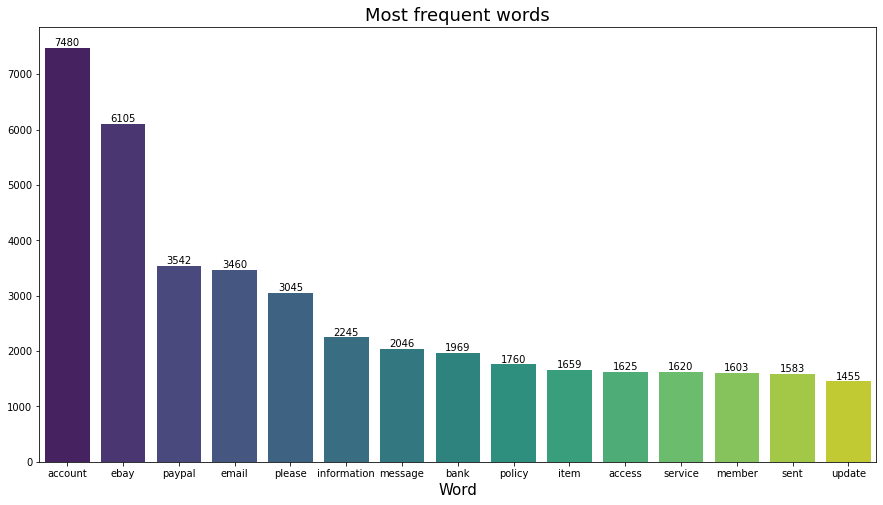

In [17]:
top_15 = nltk.FreqDist(re.findall('\w+', body_str)).most_common(15)

freq = []
word = []

for token in top_15:
    freq.append(token[1])
    word.append(token[0])
    
ax = sns.barplot(word, freq, palette='viridis')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Word', fontsize=15)
ax.set_title('Most frequent words', fontsize=18)
plt.show()

In [12]:
url_count = []
dot_count = []

account = []
ebay = []
paypal = []
email = []
please = []
information = []
message = []
bank = []
policy = []
access = []
member = []
update = []


for body in phishing_body:
    
    if 'account' in body.lower():
        account.append(1)
    else:
        account.append(0)
        
    if 'ebay' in body.lower():
        ebay.append(1)
    else:
        ebay.append(0)
        
    if 'paypal' in body.lower():
        paypal.append(1)
    else:
        paypal.append(0)
    
    if 'email' in body.lower():
        email.append(1)
    else:
        email.append(0)
    
    if 'please' in body.lower():
        please.append(1)
    else:
        please.append(0)
    
    if 'information' in body.lower():
        information.append(1)
    else:
        information.append(0)
    
    if 'message' in body.lower():
        message.append(1)
    else:
        message.append(0)
    
    if 'bank' in body.lower():
        bank.append(1)
    else:
        bank.append(0)
    
    if 'policy' in body.lower():
        policy.append(1)
    else:
        policy.append(0)
    
    if 'access' in body.lower():
        access.append(1)
    else:
        access.append(0)
     
    if 'member' in body.lower():
        member.append(1)
    else:
        member.append(0)
    
    if 'update' in body.lower():
        update.append(1)
    else:
        update.append(0)
        
    pattern = r"\b((?:https?://)?(?:(?:www\.)?(?:[\da-z\.-]+)\.(?:[a-z]{2,6})|(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)|(?:(?:[0-9a-fA-F]{1,4}:){7,7}[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,7}:|(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|[0-9a-fA-F]{1,4}:(?:(?::[0-9a-fA-F]{1,4}){1,6})|:(?:(?::[0-9a-fA-F]{1,4}){1,7}|:)|fe80:(?::[0-9a-fA-F]{0,4}){0,4}%[0-9a-zA-Z]{1,}|::(?:ffff(?::0{1,4}){0,1}:){0,1}(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])|(?:[0-9a-fA-F]{1,4}:){1,4}:(?:(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])\.){3,3}(?:25[0-5]|(?:2[0-4]|1{0,1}[0-9]){0,1}[0-9])))(?::[0-9]{1,4}|[1-5][0-9]{4}|6[0-4][0-9]{3}|65[0-4][0-9]{2}|655[0-2][0-9]|6553[0-5])?(?:/[\w\.-]*)*/?)\b"
    url_matches = re.findall(pattern, body)
    url_count.append(len(url_matches))
    
    max_dot_count = 0
    for url in url_matches:
        dots = url.count('.')
        if max_dot_count < dots:
            max_dot_count = dots
    dot_count.append(max_dot_count)

In [14]:
df_phishing = pd.DataFrame()

df_phishing['HTML_tag'] = html_tag
df_phishing['img_tag'] = img_tag
df_phishing['dots'] = dot_count
df_phishing['urls'] = url_count

df_phishing['account'] = account
df_phishing['ebay'] = ebay
df_phishing['paypal'] = paypal
df_phishing['email'] = email
df_phishing['please'] = please
df_phishing['information'] = information
df_phishing['message'] = message
df_phishing['bank'] = bank
df_phishing['policy'] = policy
df_phishing['access'] = access
df_phishing['member'] = member
df_phishing['update'] = update

df_phishing['target'] = 'Phishing'

df_phishing

,HTML_tag,img_tag,dots,urls,account,ebay,paypal,email,please,information,message,bank,policy,access,member,update,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Phishing
1,23,0,3,1,1,1,0,0,1,1,0,0,1,0,1,1,Phishing
2,95,12,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Phishing
3,101,1,2,2,1,0,1,1,1,1,0,0,1,1,1,1,Phishing
4,110,7,6,3,1,0,1,1,1,1,0,0,0,1,1,1,Phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Phishing
2256,107,5,0,0,1,1,0,0,0,1,0,0,1,0,1,0,Phishing
2257,25,0,1,1,1,0,1,0,1,1,0,0,0,0,1,0,Phishing
2258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Phishing


In [18]:
df_phishing.to_csv(r'.\phishing_data.csv', index=False)